### EDA Dataset cardiff nlp

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from nltk.corpus import stopwords
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from wordcloud import WordCloud

from datasets import load_dataset, concatenate_datasets, ClassLabel, Features, Value
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [2]:
# download italian stop words
nltk.download('stopwords')

italian_stop_words = set(stopwords.words('italian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# contains email and sentiment to add to the training dataset
# hand labelled
DATASET_NAME = "cardiffnlp/tweet_sentiment_multilingual"
SUBSET_NAME = "italian"

# load cardiff ita dataset
dataset = load_dataset(DATASET_NAME, SUBSET_NAME)["train"]

In [4]:
# for my custom dataset
def remove_non_breaking_space(example):
    # Assuming the text is under the key 'text'
    example['text'] = example['text'].replace('\xa0', ' ')
    return example

#### as Pandas Dataframe

In [5]:
dataset.set_format(type="pandas")

df = dataset[:]
df.head(10)

,text,label
0,@user mi fa sbagliare tutte le paroleeeee.,0
1,@user perfetto hai visto poi alla fine anche o...,1
2,"Rutelli: appoggio al governo #monti, sta lavor...",2
3,RT @user: Non legalizzano la #cannabis Ma iper...,0
4,"@user @user @user c'è da vergognarsi, ha fatto...",1
5,@user lo so amore grazie..,2
6,RT @user: Siamo dei falsi. I ragazzi vogliono ...,0
7,in vendita Villa Stupenda a Santo Domingo http,1
8,RT @user: ditemi se non è una delle cose più b...,2
9,"Pensioni, la falsa equità di Monti: di Sante M...",0


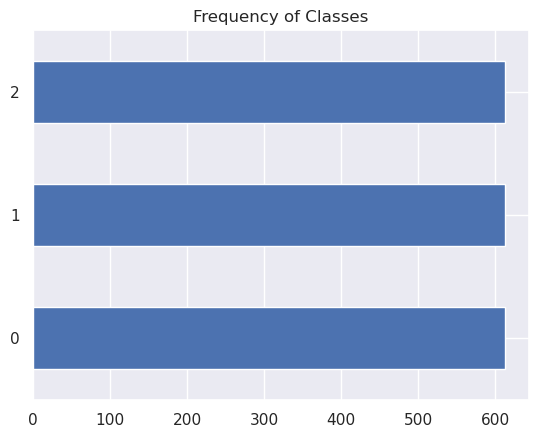

In [6]:
df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

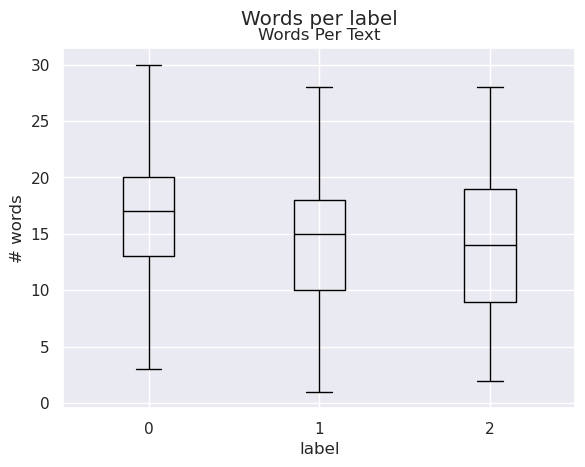

In [7]:
df["Words Per Text"] = df["text"].str.split().apply(len)

df.boxplot("Words Per Text", by="label", grid=True, showfliers=False,
           color="black")
plt.suptitle("Words per label")
plt.xlabel("label")
plt.ylabel("# words")
plt.show()

In [8]:
# prepare for Word Cloud
texts = list(df['text'].values)

# Join all texts into a single string
all_text = ' '.join(texts)

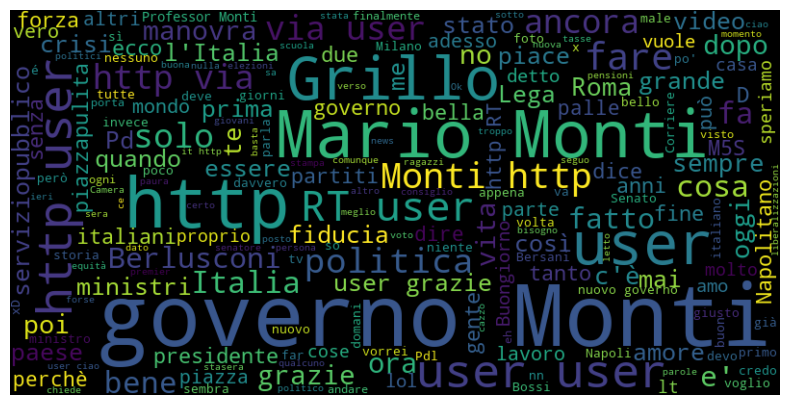

In [9]:
# Generate a word cloud image, removed Italian Stop words
wordcloud = WordCloud(stopwords=italian_stop_words, width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### some simple stats

In [10]:
# make everything lowercase
all_text = ' '.join(texts).lower()

# Tokenize and remove non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', all_text)

words = [word for word in words if word not in italian_stop_words]

# Count the frequency of each word
word_counts = Counter(words)

In [11]:
# Get the most common words
most_common_words = word_counts.most_common(10)  # Adjust the number as needed

In [12]:
word_freq = word_counts.items()

# Create a DataFrame
df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

df = df.sort_values(by='Frequency', ascending=False)

In [14]:
df.head(20)

,Word,Frequency
14,monti,837
0,user,809
48,http,605
13,governo,553
125,mario,278
68,grillo,231
201,italia,109
17,rt,109
34,grazie,83
182,via,81
